In [752]:
import pandas as pd
import seaborn as sb

df = pd.read_csv('./housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [753]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

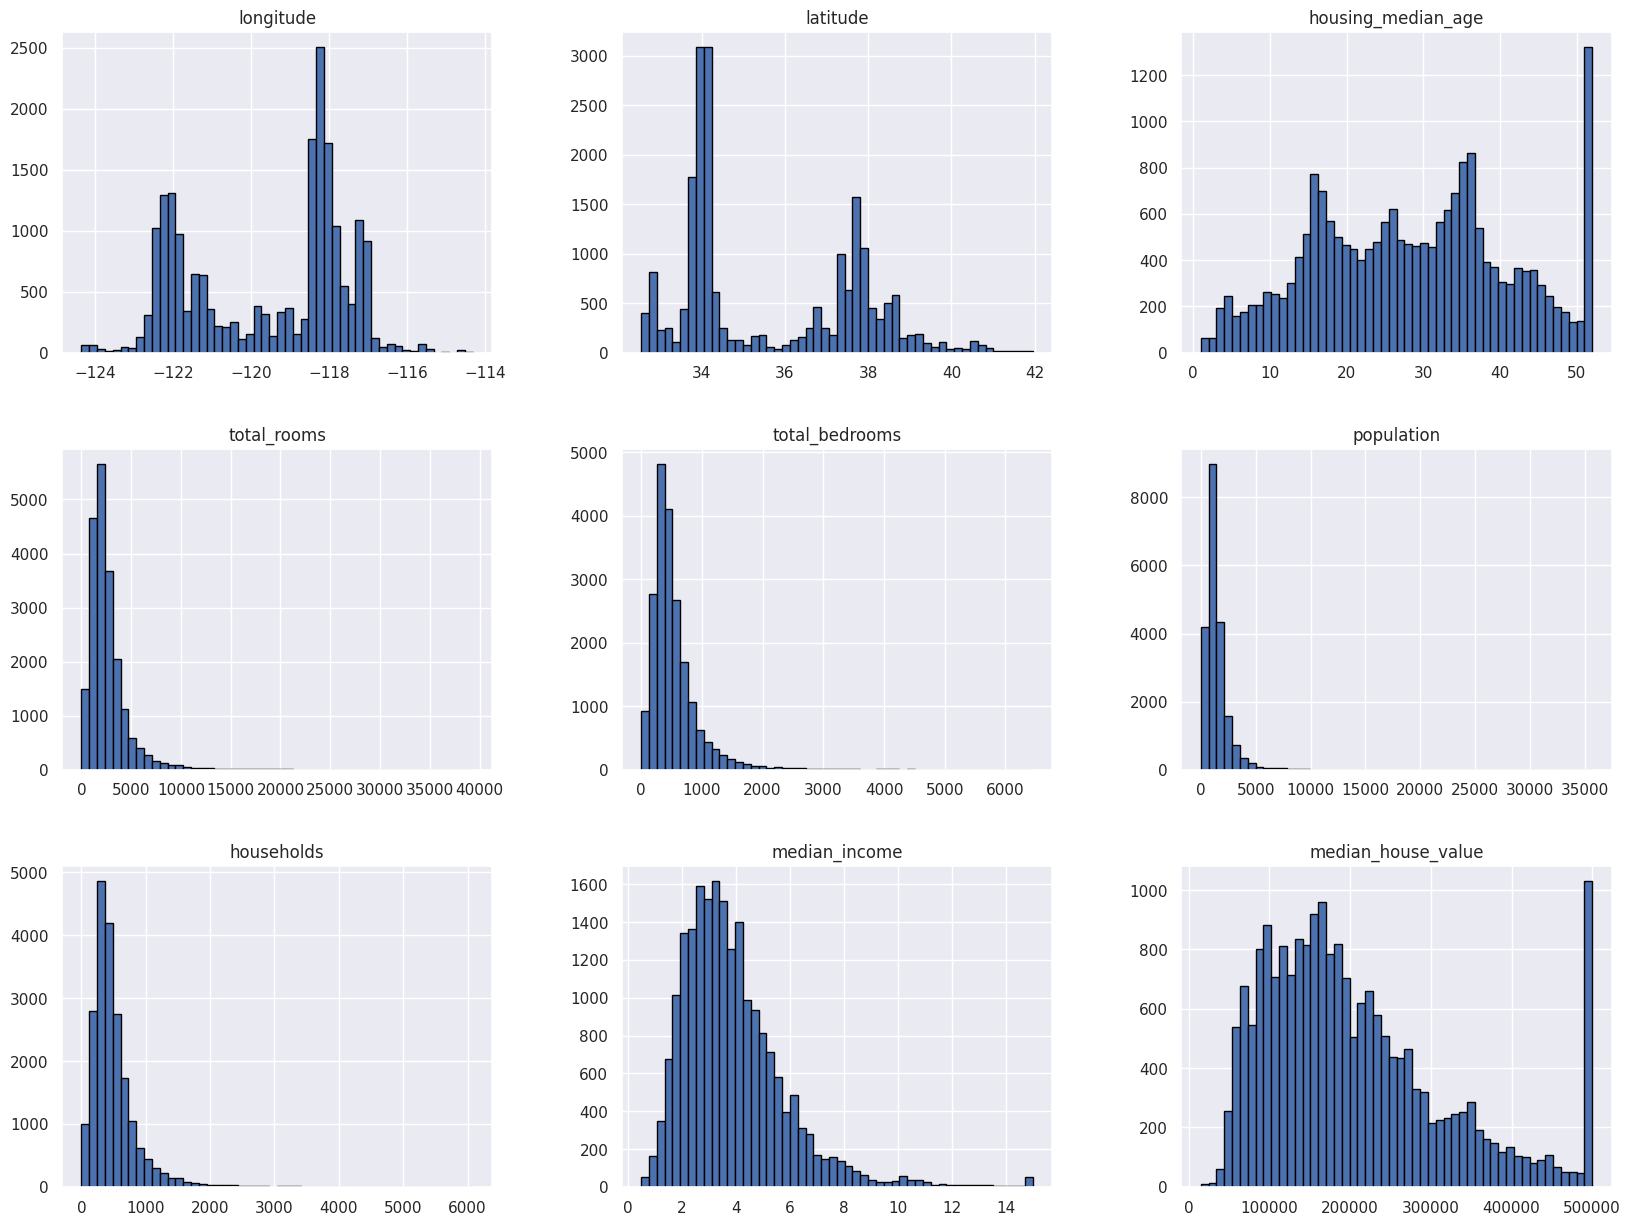

In [754]:
df.hist(bins=50, figsize=(20,15), edgecolor='black')

In [755]:
data = df.dropna() # eliminar todos los registros que tenga null en alguna columna

In [756]:

#Convertir variables categóricas a numéricas:


# datos dummies para cambiar los valores a binarios
dummies = pd.get_dummies(data['ocean_proximity'], dtype=int)

#concatenar las columnas a la data
data = pd.concat([data, dummies], axis=1)

#Eliminar la columna original
data.drop('ocean_proximity', axis=1, inplace=True)




In [757]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   <1H OCEAN           20433 non-null  int64  
 10  INLAND              20433 non-null  int64  
 11  ISLAND              20433 non-null  int64  
 12  NEAR BAY            20433 non-null  int64  
 13  NEAR OCEAN          20433 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 2.3 MB


In [758]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [759]:
data.corr()

data.corr()['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688355
<1H OCEAN,0.257614
NEAR BAY,0.160526
NEAR OCEAN,0.140378
total_rooms,0.133294
housing_median_age,0.106432
households,0.064894
total_bedrooms,0.049686
ISLAND,0.023525


In [760]:
#Creo un nuevo Data convalidando los valores nulos nuevamente
prueba = data.dropna()

In [761]:
#Elimino las columnas, que considero tienen menor relevancia y relacion con el precio de las viviendas:

prueba.drop(['NEAR BAY','NEAR OCEAN','NEAR BAY','ISLAND','<1H OCEAN','total_bedrooms'], axis=1, inplace=True)


In [762]:
prueba.corr()['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688355
total_rooms,0.133294
housing_median_age,0.106432
households,0.064894
population,-0.025300
longitude,-0.045398
latitude,-0.144638
INLAND,-0.484787


<Axes: >

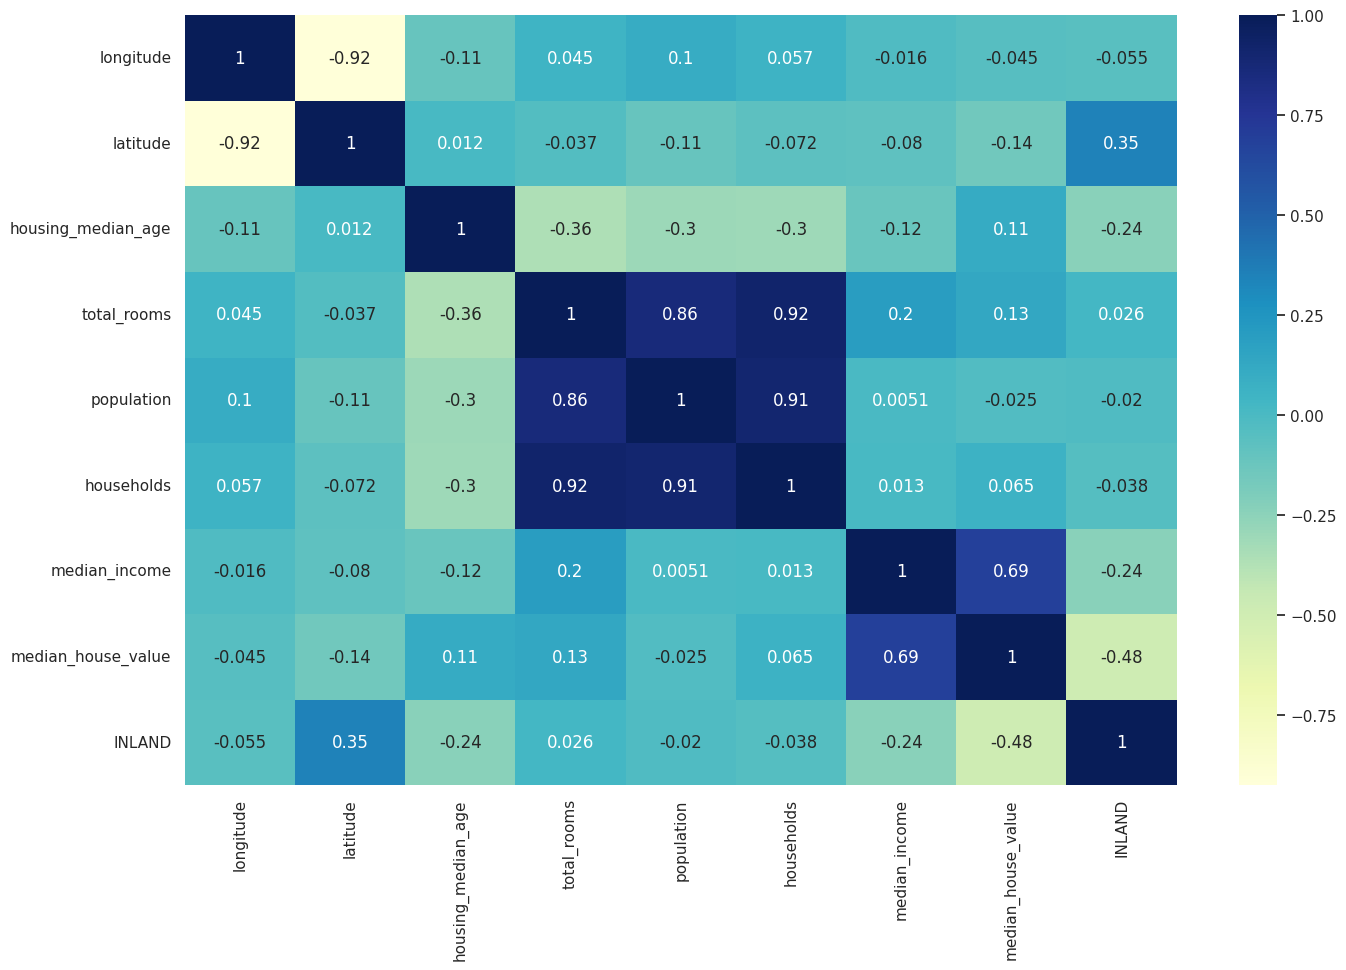

In [763]:
sb.set(rc={'figure.figsize':(16,10)})
sb.heatmap(data=prueba.corr(), annot=True, cmap='YlGnBu' )

Trabajamos el Modelo **Regresión Lineal:**

In [764]:

#obtener las caracteristicas y la etiqueta

# caracteristicas:
X = prueba.drop('median_house_value', axis=1) # Agregamos toda la data, eliminando la columna etiqueta

# Etiqueta:
y = prueba['median_house_value']

In [769]:
#Separamos las caracteristicas:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [770]:
#Creamos y entrenamos el modelo

from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(X_train, y_train)


LinearRegression()

In [771]:
#Hacemos predicciones:

predicciones = modelo.predict(X_test)

In [772]:
#Validamos el % de acierto
modelo.score(X_test, y_test)


0.6605465215766473

En este escenario elimine las columnas relacionadas NEAR BAY, NEAR OCEAN,NEAR BAY,ISLAND,1H OCEAN, porque considero son elementos no tan relevantes y pueden distorcionar los elementos mas relevantes; de igual forma eliminte columnatotal_bedrooms considerando que ya se tiene en cuenta los valores de total_rooms lo que puede denotar elementos duplicados y distorcionar los elementos más relevantes.

**Conclusion:**  Referente a los cambios aplicados, e intente con varios elementos de las columnas de la data y los resultados siguen siendo menores a la data completa, siendo este ultimo escenario el que mas se aproxima al 70%; en lagunas pruebas alcanzo el 69%; porque que se concluye que con la informacion que se tiene los valores del modelo no varíaria mucho y no se tendría un % requerido;
